In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np
from functools import reduce
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [2]:
oda_received=pd.read_excel("ODA Received.xls")
#oda_received["Country Name"].unique()

In [3]:
list_regions=['Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'Least developed countries: UN classification', 'Low income', 'Lower middle income']
condition=(oda_received["Country Name"]=='Fragile and conflict affected situations')|(oda_received["Country Name"]=='Heavily indebted poor countries (HIPC)')|(oda_received["Country Name"]=='Least developed countries: UN classification')|(oda_received["Country Name"]=='Low income')|(oda_received["Country Name"]=='Lower middle income')
oda_rec=oda_received[condition].copy()
oda_rec=oda_rec.drop("Country Code", axis=1)
#oda_rec

In [4]:
liability=pd.read_excel("Liability.xls")
condition=(liability["Country Name"]=='Fragile and conflict affected situations')|(liability["Country Name"]=='Heavily indebted poor countries (HIPC)')|(liability["Country Name"]=='Least developed countries: UN classification')|(liability["Country Name"]=='Low income')|(liability["Country Name"]=='Lower middle income')
liab=liability[condition].copy()
liab=liab.drop("Country Code", axis=1)
#liab

In [5]:
gdp=pd.read_excel("GDP Recipient.xls")
condition_2=(gdp["Country Name"]=='Fragile and conflict affected situations')|(gdp["Country Name"]=='Heavily indebted poor countries (HIPC)')|(gdp["Country Name"]=='Least developed countries: UN classification')|(gdp["Country Name"]=='Low income')|(gdp["Country Name"]=='Lower middle income')
gdp_capita=gdp[condition_2].copy()
gdp_capita=gdp_capita.drop("Country Code", axis=1)
#gdp_capita

In [6]:
inv=pd.read_excel("FDI.xls")
condition_3=(inv["Country Name"]=='Fragile and conflict affected situations')|(inv["Country Name"]=='Heavily indebted poor countries (HIPC)')|(inv["Country Name"]=='Least developed countries: UN classification')|(inv["Country Name"]=='Low income')|(inv["Country Name"]=='Lower middle income')
fdi=inv[condition_3].copy()
fdi=fdi.drop("Country Code", axis=1)
#fdi

In [7]:
inf=pd.read_excel("Inflation.xls")
condition_4=(inf["Country Name"]=='Fragile and conflict affected situations')|(inf["Country Name"]=='Heavily indebted poor countries (HIPC)')|(inf["Country Name"]=='Least developed countries: UN classification')|(inf["Country Name"]=='Low income')|(inf["Country Name"]=='Lower middle income')
inflation=inf[condition_4].copy()
inflation=inflation.drop("Country Code", axis=1)
#inflation

In [8]:
oppenness=pd.read_excel("Trade.xls")
condition_5=(oppenness["Country Name"]=='Fragile and conflict affected situations')|(oppenness["Country Name"]=='Heavily indebted poor countries (HIPC)')|(oppenness["Country Name"]=='Least developed countries: UN classification')|(oppenness["Country Name"]=='Low income')|(oppenness["Country Name"]=='Lower middle income')
trade=oppenness[condition_5].copy()
trade=trade.drop("Country Code", axis=1)
#trade

In [9]:
life=pd.read_excel("Life Expectancy.xls")
condition_7=(life["Country Name"]=='Fragile and conflict affected situations')|(life["Country Name"]=='Heavily indebted poor countries (HIPC)')|(life["Country Name"]=='Least developed countries: UN classification')|(life["Country Name"]=='Low income')|(life["Country Name"]=='Lower middle income')
life_expectancy=life[condition_7].copy()
life_expectancy=life_expectancy.drop("Country Code", axis=1)
#life_expectancy

In [10]:
debt=pd.read_excel("Debt.xls")
condition_9=(debt["Country Name"]=='Fragile and conflict affected situations')|(debt["Country Name"]=='Heavily indebted poor countries (HIPC)')|(debt["Country Name"]=='Least developed countries: UN classification')|(debt["Country Name"]=='Low income')|(debt["Country Name"]=='Lower middle income')
debt_policy=debt[condition_9].copy()
debt_policy=debt_policy.drop("Country Code", axis=1)
#debt_policy

In [11]:
labor=pd.read_excel("Labor Force.xls")
condition_10=(labor["Country Name"]=='Fragile and conflict affected situations')|(labor["Country Name"]=='Heavily indebted poor countries (HIPC)')|(labor["Country Name"]=='Least developed countries: UN classification')|(labor["Country Name"]=='Low income')|(labor["Country Name"]=='Lower middle income')
labor_force=labor[condition_10].copy()
labor_force=labor_force.drop("Country Code", axis=1)
#labor_force

In [12]:
oda_filter=pd.melt(oda_rec, id_vars=['Country Name'])
oda_filter["variable"] = oda_filter["variable"].astype(int)
oda_received_2010_2019=oda_filter[(oda_filter["variable"]>=2010)&(oda_filter["variable"]<=2019)]
oda_received_2010_2019.rename(columns={"value":"ODA Received"}, inplace=True)
oda_received_2010_2019.head(2)

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/1333767658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oda_received_2010_2019.rename(columns={"value":"ODA Received"}, inplace=True)


,Country Name,variable,ODA Received
250,Fragile and conflict affected situations,2010,3.839381e+10
251,Heavily indebted poor countries (HIPC),2010,4.396860e+10


In [13]:
liability_filter=pd.melt(liab, id_vars=['Country Name'])
liability_filter["variable"] = liability_filter["variable"].astype(int)
liability_received_2010_2019=liability_filter[(liability_filter["variable"]>=2010)&(liability_filter["variable"]<=2019)]
liability_received_2010_2019.rename(columns={"value":"Transparency_Accountability_Corruption_PublicSector_Rating"}, inplace=True)
liability_received_2010_2019.head(2)

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/561382229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liability_received_2010_2019.rename(columns={"value":"Transparency_Accountability_Corruption_PublicSector_Rating"}, inplace=True)


,Country Name,variable,Transparency_Accountability_Corruption_PublicSector_Rating
250,Fragile and conflict affected situations,2010,2.574074
251,Heavily indebted poor countries (HIPC),2010,2.657895


In [14]:
gdp_filter=pd.melt(gdp_capita, id_vars=['Country Name'])
gdp_filter["variable"] = gdp_filter["variable"].astype(int)
gdp_capita_2010_2019=gdp_filter[(gdp_filter["variable"]>=2010)&(gdp_filter["variable"]<=2019)]
gdp_capita_2010_2019.rename(columns={"value":"GDP Recipient"}, inplace=True)
gdp_capita_2010_2019.head(2)

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/1106224513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_capita_2010_2019.rename(columns={"value":"GDP Recipient"}, inplace=True)


,Country Name,variable,GDP Recipient
250,Fragile and conflict affected situations,2010,1.689111e+12
251,Heavily indebted poor countries (HIPC),2010,5.049254e+11


In [15]:
fdi_filter=pd.melt(fdi, id_vars=['Country Name'])
fdi_filter["variable"] = fdi_filter["variable"].astype(int)
fdi_2010_2019=fdi_filter[(fdi_filter["variable"]>=2010)&(fdi_filter["variable"]<=2019)]
fdi_2010_2019.rename(columns={"value":"FDI (%GDP)"}, inplace=True)
fdi_2010_2019.head(2)

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/2513161150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdi_2010_2019.rename(columns={"value":"FDI (%GDP)"}, inplace=True)


,Country Name,variable,FDI (%GDP)
250,Fragile and conflict affected situations,2010,1.976136
251,Heavily indebted poor countries (HIPC),2010,4.701794


In [16]:
inflation_filter=pd.melt(inflation, id_vars=['Country Name'])
inflation_filter["variable"] = inflation_filter["variable"].astype(int)
inflation_2010_2019=inflation_filter[(inflation_filter["variable"]>=2010)&(inflation_filter["variable"]<=2019)]
inflation_2010_2019.rename(columns={"value":"Inflation"}, inplace=True)
inflation_2010_2019.head(2)

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/4139895453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_2010_2019.rename(columns={"value":"Inflation"}, inplace=True)


,Country Name,variable,Inflation
250,Fragile and conflict affected situations,2010,3.480508
251,Heavily indebted poor countries (HIPC),2010,4.698891


In [17]:
trade_filter=pd.melt(trade, id_vars=['Country Name'])
trade_filter["variable"] = trade_filter["variable"].astype(int)
trade_2010_2019=trade_filter[(trade_filter["variable"]>=2010)&(trade_filter["variable"]<=2019)]
trade_2010_2019.rename(columns={"value":"Trade (%GDP)"}, inplace=True)
trade_2010_2019.head(2)

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/3531069834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_2010_2019.rename(columns={"value":"Trade (%GDP)"}, inplace=True)


,Country Name,variable,Trade (%GDP)
250,Fragile and conflict affected situations,2010,56.316139
251,Heavily indebted poor countries (HIPC),2010,63.986598


In [18]:
life_expectancy_filter=pd.melt(life_expectancy, id_vars=['Country Name'])
life_expectancy_filter["variable"] = life_expectancy_filter["variable"].astype(int)
life_expectancy_2010_2019=life_expectancy_filter[(life_expectancy_filter["variable"]>=2010)&(life_expectancy_filter["variable"]<=2019)]
life_expectancy_2010_2019.rename(columns={"value":"Life Expectancy (Years)"}, inplace=True)
life_expectancy_2010_2019.head(2)

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/117189239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_expectancy_2010_2019.rename(columns={"value":"Life Expectancy (Years)"}, inplace=True)


,Country Name,variable,Life Expectancy (Years)
250,Fragile and conflict affected situations,2010,59.120581
251,Heavily indebted poor countries (HIPC),2010,58.858947


In [19]:
debt_policy_filter=pd.melt(debt_policy, id_vars=['Country Name'])
debt_policy_filter["variable"] = debt_policy_filter["variable"].astype(int)
debt_policy_2010_2019=debt_policy_filter[(debt_policy_filter["variable"]>=2010)&(debt_policy_filter["variable"]<=2019)]
debt_policy_2010_2019.rename(columns={"value":"Debt Policy Rating"}, inplace=True)
debt_policy_2010_2019.head(2)

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/2307743404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debt_policy_2010_2019.rename(columns={"value":"Debt Policy Rating"}, inplace=True)


,Country Name,variable,Debt Policy Rating
250,Fragile and conflict affected situations,2010,3.166667
251,Heavily indebted poor countries (HIPC),2010,3.236842


In [20]:
labor_force_filter=pd.melt(labor_force, id_vars=['Country Name'])
labor_force_filter["variable"] = labor_force_filter["variable"].astype(int)
labor_force_2010_2019=labor_force_filter[(labor_force_filter["variable"]>=2010)&(labor_force_filter["variable"]<=2019)]
labor_force_2010_2019.rename(columns={"value":"Labor Force (%Population)"}, inplace=True)
labor_force_2010_2019.head(2)

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/574819677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor_force_2010_2019.rename(columns={"value":"Labor Force (%Population)"}, inplace=True)


,Country Name,variable,Labor Force (%Population)
250,Fragile and conflict affected situations,2010,64.843223
251,Heavily indebted poor countries (HIPC),2010,71.819260


In [21]:

list_data=[oda_received_2010_2019, labor_force_2010_2019, debt_policy_2010_2019, life_expectancy_2010_2019,
           trade_2010_2019, inflation_2010_2019, fdi_2010_2019, gdp_capita_2010_2019, liability_received_2010_2019]

#gdp_capita_2010_2019.merge(, how='inner', on=['Country Name', "variable"])

df_merge = reduce(lambda left, right: pd.merge(left, right, on=['Country Name', "variable"], how="inner"), list_data)
df_merge.rename(columns={"variable":"Year"}, inplace=True)
df_merge.head()
df_merge.to_excel("Full_Data.xls")

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/4050704968.py:9: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_merge.to_excel("Full_Data.xls")


In [22]:
##CHEAT SHEET: 

##P-value
#If 95% of the t distribution is closer to the mean than the t-value on the coefficient you are looking at, 
#then you have a P value of 5%. This is also reffered to a significance level of 5%. The P value is the 
#probability of seeing a result as extreme as the one you are getting (a t value as large as yours) in a 
#collection of random data in which the variable had no effect. A P of 5% or less is the generally 
#accepted point at which to reject the null hypothesis. With a P value of 5% (or .05) there is only a 5% 
#chance that results you are seeing would have come up in a random distribution, so you can say with a 95% 
#probability of being correct that the variable is having some effect, assuming your model is specified correctly.

#The 95% confidence interval for your coefficients shown by many regression packages gives you the same information. 
#You can be 95% confident that the real, underlying value of the coefficient that you are estimating falls somewhere 
#in that 95% confidence interval, so if the interval does not contain 0, your P value will be .05 or less.

#Note that the size of the P value for a coefficient says nothing about the size of the effect that variable 
#is having on your dependent variable - it is possible to have a highly significant result (very small P-value) 
#for a miniscule effect.

#In regression with multiple independent variables, the coefficient tells you how much the dependent variable 
#is expected to increase when that independent variable increases by one, holding all the other independent 
#variables constant. Remember to keep in mind the units which your variables are measured in.

##R-squared

#The R-squared of the regression is the fraction of the variation in your dependent variable that is accounted 
#for (or predicted by) your independent variables. (In regression with a single independent variable, it is the 
#same as the square of the correlation between your dependent and independent variable.) The R-squared is generally 
#of secondary importance, unless your main concern is using the regression equation to make accurate predictions. 
#The P value tells you how confident you can be that each individual variable has some correlation with the dependent 
#variable, which is the important thing.

#Another number to be aware of is the P value for the regression as a whole. Because your independent variables
#may be correlated, a condition known as multicollinearity, the coefficients on individual variables may be 
#insignificant when the regression as a whole is significant. Intuitively, this is because highly correlated 
#independent variables are explaining the same part of the variation in the dependent variable, so their 
#explanatory power and the significance of their coefficients is "divided up" between them.

In [23]:
###ANALYSIS FOR Fragile and conflict affected situations

In [24]:
df_merge[df_merge["Country Name"]=="Fragile and conflict affected situations"].describe()

,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
count,10.00000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000
mean,2014.50000,4.571475e+10,63.423083,2.980457,60.935553,51.186789,2.963943,1.841479,1.637483e+12,2.582876
std,3.02765,7.968928e+09,0.782910,0.156563,1.135814,5.185176,1.470797,0.480353,1.688434e+11,0.040864
min,2010.00000,3.763224e+10,62.752769,2.758065,59.120581,42.876645,1.476720,1.066310,1.407795e+12,2.500000
25%,2012.25000,4.004361e+10,62.900580,2.825000,60.122202,47.639478,1.932807,1.546953,1.544693e+12,2.568519
50%,2014.50000,4.262454e+10,63.066350,3.056989,61.032256,51.741190,2.335915,1.790504,1.617298e+12,2.583333
75%,2016.75000,5.109749e+10,63.770602,3.083333,61.812213,54.756087,3.468777,2.038660,1.725873e+12,2.599194
max,2019.00000,5.873507e+10,64.843223,3.166667,62.480088,59.423832,5.478296,2.637052,1.958696e+12,2.642857


In [25]:
df_merge[df_merge["Country Name"]=="Fragile and conflict affected situations"].corr()

,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
Year,1.000000,0.897524,-0.876975,-0.913003,0.996947,-0.593967,-0.693710,-0.558457,-0.336582,-0.608375
ODA Received,0.897524,1.000000,-0.636804,-0.926542,0.868181,-0.270663,-0.487233,-0.461779,-0.323433,-0.642785
Labor Force (%Population),-0.876975,-0.636804,1.000000,0.713049,-0.909699,0.830290,0.780976,0.615576,0.189676,0.473534
Debt Policy Rating,-0.913003,-0.926542,0.713049,1.000000,-0.894692,0.407232,0.465103,0.309666,0.455059,0.733230
Life Expectancy (Years),0.996947,0.868181,-0.909699,-0.894692,1.000000,-0.639771,-0.714919,-0.567277,-0.328500,-0.587466
Trade (%GDP),-0.593967,-0.270663,0.830290,0.407232,-0.639771,1.000000,0.839596,0.455617,0.362945,0.420211
Inflation,-0.693710,-0.487233,0.780976,0.465103,-0.714919,0.839596,1.000000,0.743563,0.188707,0.505991
FDI (%GDP),-0.558457,-0.461779,0.615576,0.309666,-0.567277,0.455617,0.743563,1.000000,-0.386884,0.112826
GDP Recipient,-0.336582,-0.323433,0.189676,0.455059,-0.328500,0.362945,0.188707,-0.386884,1.000000,0.489107
Transparency_Accountability_Corruption_PublicSector_Rating,-0.608375,-0.642785,0.473534,0.733230,-0.587466,0.420211,0.505991,0.112826,0.489107,1.000000


In [26]:
##Observations: 
##1) Analysing GDP, we see that only FDI has a weak corretalion with it. 
##2) FDI has a relatevely strong negatively corr with ODA received. That means that if we increase ODA, the GDP decreases
##3) GDP has littler (almost none) corr with FDI
##4) ODA has a strong negatively corr with liability, which means the higher the rate, the lower ODA -- weird. Same with debt rate
##ODA is not that correlated with trade (oppenness to the market)

In [27]:
df_fragile=df_merge[df_merge["Country Name"]=="Fragile and conflict affected situations"]
#df_fragile.head(2)

In [28]:
df_fragile.columns

Index(['Country Name', 'Year', 'ODA Received', 'Labor Force (%Population)',
       'Debt Policy Rating', 'Life Expectancy (Years)', 'Trade (%GDP)',
       'Inflation', 'FDI (%GDP)', 'GDP Recipient',
       'Transparency_Accountability_Corruption_PublicSector_Rating'],
      dtype='object')

In [29]:
df_fragile.to_excel("df_fragile.xls")

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/2933065546.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_fragile.to_excel("df_fragile.xls")


In [30]:
model_fragile = linear_model.LinearRegression()
X_fragile = df_fragile[["Year", "FDI (%GDP)", "ODA Received", "Labor Force (%Population)", "Life Expectancy (Years)", "Trade (%GDP)", "Inflation", "Transparency_Accountability_Corruption_PublicSector_Rating", "Debt Policy Rating"]]
y_fragile = df_fragile['GDP Recipient']
result_fragile = model_fragile.fit(X_fragile,y_fragile)

print(result_fragile.score(X_fragile,y_fragile))

0.9999999999999784


In [31]:
display(X_fragile[-1:])
print(y_fragile[-1:])
result_fragile.predict(X_fragile[-1:])

,Year,FDI (%GDP),ODA Received,Labor Force (%Population),Life Expectancy (Years),Trade (%GDP),Inflation,Transparency_Accountability_Corruption_PublicSector_Rating,Debt Policy Rating
45,2019,1.392875,5.873507e+10,62.888556,62.480088,51.799468,2.377587,2.548387,2.758065


45    1.661766e+12
Name: GDP Recipient, dtype: float64


array([1.66176578e+12])

In [32]:
result_fragile.coef_

array([ 1.00549472e+12,  1.22172432e+10, -2.96891041e+01, -1.09713140e+12,
       -3.13911278e+12,  7.44531510e+10, -1.25397744e+11,  1.86340887e+12,
       -4.44022978e+11])

In [33]:
result_fragile.intercept_

-1768658786430311.8

In [34]:
##we can see that in this case the coef of ODA is significant but negative in the regression line. The other variables
##have more strong coef, like life expec, liability, FDI. 

In [35]:
np.sqrt(mean_squared_error(y_fragile, model_fragile.predict(X_fragile)))

##that means that my model is making an error by only 23587 dollars which is really small
##our model predicts really well

23587.628095489443

In [36]:
#Lets try to do a regression with ODA only


model_ODA_fragile = linear_model.LinearRegression()
X_ODA_fragile = df_fragile[["ODA Received"]]
y_ODA_fragile = df_fragile['GDP Recipient']
result_ODA_fragile = model_ODA_fragile.fit(X_ODA_fragile,y_ODA_fragile)

print(result_ODA_fragile.score(X_ODA_fragile,y_ODA_fragile))
display(X_ODA_fragile[-1:])
print(y_ODA_fragile[-1:])
result_ODA_fragile.predict(X_ODA_fragile[-1:])

##our model is not that good since R-squared is small, and the coef of ODA continues small, so it doesnt explain GDP that much

0.10460866251661016


,ODA Received
45,5.873507e+10


45    1.661766e+12
Name: GDP Recipient, dtype: float64


array([1.54825727e+12])

In [37]:
result_ODA_fragile.coef_

array([-6.85279895])

In [38]:
###ANALYSIS FOR Heavily indebted poor countries (HIPC)

In [39]:
df_merge[df_merge["Country Name"]=="Heavily indebted poor countries (HIPC)"].describe()

,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
count,10.00000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000
mean,2014.50000,4.077596e+10,70.762612,3.266856,61.420539,58.242670,4.572376,4.466506,6.588416e+11,2.679801
std,3.02765,2.764753e+09,0.562371,0.098871,1.567590,5.041891,1.242817,0.766065,9.058799e+10,0.032966
min,2010.00000,3.660734e+10,70.206722,3.118421,58.858947,52.794768,2.685374,3.420102,5.049254e+11,2.631579
25%,2012.25000,3.876375e+10,70.306938,3.187500,60.317508,53.600741,3.823017,3.802923,5.968616e+11,2.658962
50%,2014.50000,4.064372e+10,70.560671,3.279872,61.593634,57.008678,4.681777,4.413247,6.643159e+11,2.666607
75%,2016.75000,4.347785e+10,71.059186,3.342105,62.642325,63.218593,5.115412,5.010521,7.120882e+11,2.697368
max,2019.00000,4.415181e+10,71.819260,3.394737,63.486455,65.010992,6.429397,5.664416,7.898317e+11,2.736842


In [40]:
df_merge[df_merge["Country Name"]=="Heavily indebted poor countries (HIPC)"].corr()

,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
Year,1.000000,-0.335798,-0.949552,-0.601910,0.994714,-0.933581,-0.740676,-0.817701,0.964143,-0.430333
ODA Received,-0.335798,1.000000,0.574783,-0.377637,-0.421213,0.551893,0.218526,0.268503,-0.320379,-0.091311
Labor Force (%Population),-0.949552,0.574783,1.000000,0.341482,-0.976089,0.927684,0.646699,0.697082,-0.932340,0.298275
Debt Policy Rating,-0.601910,-0.377637,0.341482,1.000000,-0.525440,0.492804,0.450279,0.648765,-0.498456,0.733856
Life Expectancy (Years),0.994714,-0.421213,-0.976089,-0.525440,1.000000,-0.944352,-0.717996,-0.791047,0.966056,-0.387319
Trade (%GDP),-0.933581,0.551893,0.927684,0.492804,-0.944352,1.000000,0.729366,0.863700,-0.870336,0.423172
Inflation,-0.740676,0.218526,0.646699,0.450279,-0.717996,0.729366,1.000000,0.801205,-0.745118,0.196788
FDI (%GDP),-0.817701,0.268503,0.697082,0.648765,-0.791047,0.863700,0.801205,1.000000,-0.736376,0.385924
GDP Recipient,0.964143,-0.320379,-0.932340,-0.498456,0.966056,-0.870336,-0.745118,-0.736376,1.000000,-0.249459
Transparency_Accountability_Corruption_PublicSector_Rating,-0.430333,-0.091311,0.298275,0.733856,-0.387319,0.423172,0.196788,0.385924,-0.249459,1.000000


In [41]:
#Observations: 
# 1) In this case, GDP is significanly correlated with all the indep variables, except liability 
#(transparancy, accountability etc). 
# 2) For ODA and Debt policy rating, the corr is not that strong
# 3) GDP is strong negatively related to trade and labor force
# 4) ODA is positively and kind of strong related to labor force and trade

In [42]:
df_heavily=df_merge[df_merge["Country Name"]=="Heavily indebted poor countries (HIPC)"]
#df_heavily.head(2)

In [43]:
df_heavily.to_excel("df_heavily.xls")

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/1455448521.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_heavily.to_excel("df_heavily.xls")


In [44]:
model_heavily = linear_model.LinearRegression()
X_heavily = df_heavily[["Year", "FDI (%GDP)", "ODA Received", "Labor Force (%Population)", "Life Expectancy (Years)", "Trade (%GDP)", "Inflation", "Transparency_Accountability_Corruption_PublicSector_Rating", "Debt Policy Rating"]]
y_heavily = df_heavily['GDP Recipient']
result_heavily = model_heavily.fit(X_heavily,y_heavily)

print(result_heavily.score(X_heavily,y_heavily))
print(result_heavily.coef_)

#we can see that the coef of ODA is big and positive which means that we can explain growth by ODA given other variables
#Important coefs are lufe expec(positively), liability(negatively), labor force(positivel)

0.9999999999999821
[-5.03970343e+11 -5.62651765e+10  3.89924393e+01  3.06918123e+11
  1.13159630e+12  5.58864086e+09 -3.18281962e+10 -5.39584694e+11
 -4.85078541e+10]


In [45]:
np.sqrt(mean_squared_error(y_heavily, model_heavily.predict(X_heavily)))

##that means that my model is making an error by only 0.55 dollars which is really small
#our model predicts really well

11498.944077768785

In [46]:
##Lets try to do a regression with oda only


model_ODA_heavily = linear_model.LinearRegression()
X_ODA_heavily = df_heavily[["ODA Received"]]
y_ODA_heavily = df_heavily['GDP Recipient']
result_ODA_heavily = model_ODA_heavily.fit(X_ODA_heavily,y_ODA_heavily)

print(result_ODA_heavily.score(X_ODA_heavily,y_ODA_heavily))
print(result_ODA_heavily.coef_)

##our model is bad and coef ODA is still low

0.10264253239586263
[-10.4973076]


In [47]:
###ANALYSIS FOR Least developed countries: UN classification

In [48]:
df_merge[df_merge["Country Name"]=="Least developed countries: UN classification"].describe()

,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
count,10.00000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000
mean,2014.50000,4.686216e+10,68.808570,3.200272,63.579786,54.914709,4.922109,2.786815,9.201418e+11,2.689766
std,3.02765,4.645052e+09,0.381492,0.080102,1.336801,4.274566,1.250266,0.767398,1.343448e+11,0.032122
min,2010.00000,4.310961e+10,68.347334,3.076087,61.388934,49.433923,2.869094,1.730708,6.737312e+11,2.641304
25%,2012.25000,4.355384e+10,68.553184,3.122222,62.644107,51.294379,4.074295,2.224077,8.352382e+11,2.668478
50%,2014.50000,4.424509e+10,68.750600,3.230676,63.728405,55.045780,5.129141,2.811608,9.412405e+11,2.688889
75%,2016.75000,4.870431e+10,68.946257,3.269380,64.617354,58.939385,5.564520,3.084538,1.009920e+12,2.699419
max,2019.00000,5.569676e+10,69.540799,3.288889,65.345421,60.092158,6.788194,4.088185,1.107362e+12,2.744186


In [49]:
df_merge[df_merge["Country Name"]=="Least developed countries: UN classification"].corr()

,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
Year,1.000000,0.750237,-0.703457,-0.805905,0.994648,-0.823482,-0.814533,-0.603462,0.965683,-0.718452
ODA Received,0.750237,1.000000,-0.163734,-0.794029,0.696595,-0.308661,-0.685685,-0.836365,0.732380,-0.666461
Labor Force (%Population),-0.703457,-0.163734,1.000000,0.261598,-0.766379,0.750201,0.553804,-0.006886,-0.753032,0.303523
Debt Policy Rating,-0.805905,-0.794029,0.261598,1.000000,-0.760304,0.613971,0.527847,0.819519,-0.681423,0.833661
Life Expectancy (Years),0.994648,0.696595,-0.766379,-0.760304,1.000000,-0.841964,-0.795508,-0.543270,0.974180,-0.696322
Trade (%GDP),-0.823482,-0.308661,0.750201,0.613971,-0.841964,1.000000,0.602901,0.285167,-0.733606,0.634146
Inflation,-0.814533,-0.685685,0.553804,0.527847,-0.795508,0.602901,1.000000,0.466133,-0.803908,0.550892
FDI (%GDP),-0.603462,-0.836365,-0.006886,0.819519,-0.543270,0.285167,0.466133,1.000000,-0.532005,0.605431
GDP Recipient,0.965683,0.732380,-0.753032,-0.681423,0.974180,-0.733606,-0.803908,-0.532005,1.000000,-0.614655
Transparency_Accountability_Corruption_PublicSector_Rating,-0.718452,-0.666461,0.303523,0.833661,-0.696322,0.634146,0.550892,0.605431,-0.614655,1.000000


In [50]:
#Observations: 
# 1) In this case, GDP is significanly correlated with all the indep variables, being positively with ODA
# 2) ODA is strong negatively corr with debt policy rate (if one increases, other decreases - weird), liability (weird), FDI

In [51]:
df_least=df_merge[df_merge["Country Name"]=="Least developed countries: UN classification"]
#df_least.head(2)

In [52]:
df_least.to_excel("df_least.xls")

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/850496779.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_least.to_excel("df_least.xls")


In [53]:
model_least = linear_model.LinearRegression()
X_least = df_least[["Year", "FDI (%GDP)", "ODA Received", "Labor Force (%Population)", "Life Expectancy (Years)", "Trade (%GDP)", "Inflation", "Transparency_Accountability_Corruption_PublicSector_Rating", "Debt Policy Rating"]]
y_least = df_least['GDP Recipient']
result_least = model_least.fit(X_least,y_least)

print(result_least.score(X_least,y_least))
print(result_least.coef_)

#really good predict model
#coef of ODA big and positive

0.9999999999999425
[-1.18662860e+12  1.19878503e+11  6.85414581e+01  4.79438774e+11
  2.37940525e+12 -5.28262537e+10 -1.78274440e+11  7.18191393e+12
 -4.68174195e+12]


In [54]:
np.sqrt(mean_squared_error(y_least, model_least.predict(X_least)))

#our model is wrong by 13 dollars

30558.361786025307

In [55]:
#Lets try to do regression for ODA only

model_ODA_least = linear_model.LinearRegression()
X_ODA_least = df_least[["ODA Received"]]
y_ODA_least = df_least['GDP Recipient']
result_ODA_least = model_ODA_least.fit(X_ODA_least,y_ODA_least)

print(result_ODA_least.score(X_ODA_least,y_ODA_least))
print(result_ODA_least.coef_)

#our R squared is ok, but coef is still very small

0.5363806873314978
[21.1819907]


In [117]:
print(result_ODA_least.intercept_)

-72492035270.72095


In [56]:
###ANALYSIS FOR Low income

In [57]:
df_merge[df_merge["Country Name"]=="Low income"].describe()

,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
count,10.00000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000
mean,2014.50000,3.930566e+10,69.102038,3.017178,61.901038,51.000582,5.576399,3.991012,4.274514e+11,2.457710
std,3.02765,6.671897e+09,0.437835,0.138670,1.342270,4.928349,1.794328,1.043714,5.642058e+10,0.067499
min,2010.00000,3.308972e+10,68.633303,2.820000,59.739740,44.145136,2.825100,2.652487,3.844478e+11,2.360000
25%,2012.25000,3.458936e+10,68.794421,2.875000,60.951074,47.420681,4.484901,3.373380,3.975990e+11,2.417500
50%,2014.50000,3.591833e+10,68.920260,3.083333,62.014996,50.145773,5.296348,3.610227,4.136520e+11,2.437500
75%,2016.75000,4.391231e+10,69.339471,3.120924,62.932558,54.222112,6.829835,4.571830,4.251744e+11,2.489583
max,2019.00000,4.996988e+10,69.930830,3.173913,63.727749,59.760608,8.279537,6.161376,5.782091e+11,2.586957


In [58]:
df_merge[df_merge["Country Name"]=="Low income"].corr()

,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
Year,1.000000,0.923308,-0.948761,-0.861626,0.996783,-0.777356,-0.406880,-0.370631,-0.300316,-0.759813
ODA Received,0.923308,1.000000,-0.764799,-0.931845,0.893933,-0.497657,-0.389790,-0.461849,-0.093373,-0.574187
Labor Force (%Population),-0.948761,-0.764799,1.000000,0.701779,-0.969956,0.891800,0.355663,0.233112,0.475252,0.809611
Debt Policy Rating,-0.861626,-0.931845,0.701779,1.000000,-0.833990,0.447851,0.231080,0.356255,0.089523,0.702021
Life Expectancy (Years),0.996783,0.893933,-0.969956,-0.833990,1.000000,-0.813937,-0.383212,-0.337473,-0.354062,-0.783817
Trade (%GDP),-0.777356,-0.497657,0.891800,0.447851,-0.813937,1.000000,0.212184,0.209844,0.482748,0.755282
Inflation,-0.406880,-0.389790,0.355663,0.231080,-0.383212,0.212184,1.000000,0.540590,-0.397252,0.081209
FDI (%GDP),-0.370631,-0.461849,0.233112,0.356255,-0.337473,0.209844,0.540590,1.000000,-0.653634,0.078245
GDP Recipient,-0.300316,-0.093373,0.475252,0.089523,-0.354062,0.482748,-0.397252,-0.653634,1.000000,0.391818
Transparency_Accountability_Corruption_PublicSector_Rating,-0.759813,-0.574187,0.809611,0.702021,-0.783817,0.755282,0.081209,0.078245,0.391818,1.000000


In [59]:
##observations:
## 1) GDP is storngly correlated with all variables, except inflation and fdi
## 2) GDP is not that strongly corr with ODA (negative - which means that if it increases, the other decreases - weird) and debt policy rate (positive)
## 3) ODA is negatively corr with trade (one of codition to give aid is opennes to trade - so weird), fdi and liability - weird

In [60]:
df_low=df_merge[df_merge["Country Name"]=="Low income"]
#df_low.head(2)

In [61]:
df_low.to_excel("df_low.xls")

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/2997576856.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_low.to_excel("df_low.xls")


In [62]:
model_low = linear_model.LinearRegression()
X_low = df_low[["Year", "FDI (%GDP)", "ODA Received", "Labor Force (%Population)", "Life Expectancy (Years)", "Trade (%GDP)", "Inflation", "Transparency_Accountability_Corruption_PublicSector_Rating", "Debt Policy Rating"]]
y_low = df_low['GDP Recipient']
result_low = model_low.fit(X_low,y_low)

print(result_low.score(X_low,y_low))
print(result_low.coef_)

#really good model
#big and positive coef for oda

0.9999999999999938
[ 1.32082411e+11 -3.02508208e+10  1.36390953e+01 -3.65858301e+11
 -5.55688126e+11 -8.01901406e+09 -1.12500502e+10 -3.96258869e+11
 -1.64738105e+11]


In [63]:
np.sqrt(mean_squared_error(y_low, model_low.predict(X_low)))
#our model is wrong by 4228 dollars

4228.653748366703

In [64]:
#Lets see the regression with ODA only

model_ODA_low = linear_model.LinearRegression()
X_ODA_low = df_low[["ODA Received"]]
y_ODA_low = df_low['GDP Recipient']
result_ODA_low = model_ODA_low.fit(X_ODA_low,y_ODA_low)

print(result_ODA_low.score(X_ODA_low,y_ODA_low))
print(result_ODA_low.coef_)

#model is ok
#small coef for oda

0.008718455716358653
[-0.78960168]


In [65]:
###ANALYSIS FOR Lower middle income

In [66]:
df_merge[df_merge["Country Name"]=="Lower middle income"].describe()

,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
count,10.00000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000
mean,2014.50000,4.485065e+10,59.087671,3.514610,67.866874,53.661379,4.487863,1.897563,6.583266e+12,2.948599
std,3.02765,4.082683e+09,0.696918,0.077809,0.916117,4.021169,1.002541,0.123398,7.381127e+11,0.037187
min,2010.00000,3.914048e+10,58.432277,3.384615,66.372159,47.336234,3.319254,1.725899,5.200811e+12,2.865854
25%,2012.25000,4.235392e+10,58.520868,3.450658,67.223833,50.652477,3.691041,1.818935,6.258535e+12,2.937042
50%,2014.50000,4.428579e+10,58.852280,3.554152,67.960777,54.430721,4.386205,1.896964,6.527749e+12,2.947368
75%,2016.75000,4.660058e+10,59.449176,3.576290,68.577483,55.939638,5.162040,1.936585,7.119255e+12,2.976045
max,2019.00000,5.302362e+10,60.406194,3.585366,69.088492,59.655201,6.332795,2.168228,7.735773e+12,2.988372


In [67]:
df_merge[df_merge["Country Name"]=="Lower middle income"].corr()

,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
Year,1.000000,0.235140,-0.936761,-0.866666,0.995327,-0.641092,-0.826215,0.031930,0.964989,0.118180
ODA Received,0.235140,1.000000,-0.378705,0.120203,0.284009,-0.122320,0.003324,-0.098707,0.340693,0.706819
Labor Force (%Population),-0.936761,-0.378705,1.000000,0.658225,-0.965772,0.709259,0.777231,0.008631,-0.909463,-0.382592
Debt Policy Rating,-0.866666,0.120203,0.658225,1.000000,-0.819279,0.424345,0.737439,-0.001504,-0.819580,0.319092
Life Expectancy (Years),0.995327,0.284009,-0.965772,-0.819279,1.000000,-0.666645,-0.818686,0.029794,0.963604,0.197801
Trade (%GDP),-0.641092,-0.122320,0.709259,0.424345,-0.666645,1.000000,0.871759,-0.123435,-0.482233,-0.117316
Inflation,-0.826215,0.003324,0.777231,0.737439,-0.818686,0.871759,1.000000,-0.007890,-0.680702,0.099441
FDI (%GDP),0.031930,-0.098707,0.008631,-0.001504,0.029794,-0.123435,-0.007890,1.000000,-0.017353,0.108217
GDP Recipient,0.964989,0.340693,-0.909463,-0.819580,0.963604,-0.482233,-0.680702,-0.017353,1.000000,0.239559
Transparency_Accountability_Corruption_PublicSector_Rating,0.118180,0.706819,-0.382592,0.319092,0.197801,-0.117316,0.099441,0.108217,0.239559,1.000000


In [68]:
##Observations:
##1) GDP is strongly corr with variables, except ODA (not that much, but its positive), trade (not that much but it´s 
##negative which means that trade is not a good thing for those countries, while ODA is), fdi(low and negative), liability (not that much and positive)
## 2) ODA is not strongly related with anything except liability (positive)

In [69]:
df_lowermiddle=df_merge[df_merge["Country Name"]=="Lower middle income"]
df_lowermiddle.head(2)

,Country Name,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
4,Lower middle income,2010,3.914048e+10,60.406194,3.560976,66.372159,55.583573,4.827342,1.889465,5.200811e+12,2.865854
9,Lower middle income,2011,4.117182e+10,60.028412,3.559524,66.766305,59.655201,6.332795,1.982994,5.935836e+12,2.940476


In [70]:
df_lowermiddle.to_excel("df_lowermiddle.xls")

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/1723490168.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_lowermiddle.to_excel("df_lowermiddle.xls")


In [71]:
model_lowermiddle = linear_model.LinearRegression()
X_lowermiddle = df_lowermiddle[["Year", "FDI (%GDP)", "ODA Received", "Labor Force (%Population)", "Life Expectancy (Years)", "Trade (%GDP)", "Inflation", "Transparency_Accountability_Corruption_PublicSector_Rating", "Debt Policy Rating"]]
y_lowermiddle = df_lowermiddle['GDP Recipient']
result_lowermiddle = model_lowermiddle.fit(X_lowermiddle,y_lowermiddle)

print(result_lowermiddle.score(X_lowermiddle,y_lowermiddle))
print(result_lowermiddle.coef_)

#really good model
#big coef for oda but negative

0.9999999999920559
[-1.15161525e+13 -2.54021426e+12 -7.16381836e+01  1.76034752e+13
  5.18647923e+13  2.71240685e+11 -1.35277653e+12 -2.86438557e+12
  8.16450322e+12]


In [72]:
np.sqrt(mean_squared_error(y_lowermiddle, model_lowermiddle.predict(X_lowermiddle)))
#our model is wrong by 15 dollars

1973634.8718633428

In [73]:
#lets see the regression with ODA only

model_ODA_lowermiddle = linear_model.LinearRegression()
X_ODA_lowermiddle = df_lowermiddle[["ODA Received"]]
y_ODA_lowermiddle = df_lowermiddle['GDP Recipient']
result_ODA_lowermiddle = model_ODA_lowermiddle.fit(X_ODA_lowermiddle,y_ODA_lowermiddle)

print(result_ODA_lowermiddle.score(X_ODA_lowermiddle,y_ODA_lowermiddle))
print(result_ODA_lowermiddle.coef_)

#really really good model
#small coef for oda

0.11607191478873347
[61.59430528]


In [74]:
##Predicting for Lower Middle Income Countries & Least Developed Countries (positive relation between GDP and ODA)
#Questions: How will they be if we increase the ODA for 0.7% of the GDP of the OECD/DAC donor countries in 2022? Will they change
#their income classification?

In [75]:
##First, we need to predict the GDP of the DAC donor countries for 2022
##Second, we need to predict our indep variable values for 2022
##Third, using our regression models for Lower Middle Income Countries & Least Developed Countries, we can see how their GDP will be affected

In [76]:
###Predicting the DAC countries GDP

GDP_DonorCountries = pd.read_excel("GDP DAC.xls")


list_DonorCountries=["Australia", "Austria", "Belgium", "Canada", "Czech Republic", "Denmark", "European Union", "Finland", "France",
              "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Japan", "Korea", "Luxembourg", "The Netherland",
              "New Zealand", "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland",
              "United Kingdom", "United States"]


condition=GDP_DonorCountries["Country Name"].isin(list_DonorCountries)
    
GDP_DonorCountries=GDP_DonorCountries[condition].copy()

GDP_DonorCountries.head()


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
13,Australia,1.860679e+10,1.968306e+10,1.992272e+10,2.153993e+10,2.380110e+10,2.597715e+10,2.730989e+10,3.044462e+10,3.271699e+10,...,1.397908e+12,1.546509e+12,1.576335e+12,1.467505e+12,1.350534e+12,1.206685e+12,1.326883e+12,1.428530e+12,1.391953e+12,1.327836e+12
14,Austria,6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,1.088768e+10,1.157943e+10,1.244063e+10,...,4.311203e+11,4.094252e+11,4.300687e+11,4.419961e+11,3.818176e+11,3.955686e+11,4.162305e+11,4.549459e+11,4.450119e+11,4.332585e+11
17,Belgium,1.165872e+10,1.240015e+10,1.326402e+10,1.426002e+10,1.596011e+10,1.737146e+10,1.865188e+10,1.999204e+10,2.137635e+10,...,5.226455e+11,4.961813e+11,5.216427e+11,5.346781e+11,4.621497e+11,4.757396e+11,5.015229e+11,5.430085e+11,5.352887e+11,5.218613e+11
35,Canada,4.046172e+10,4.093495e+10,4.222745e+10,4.502999e+10,4.937752e+10,5.451518e+10,6.108838e+10,6.566866e+10,7.182981e+10,...,1.793327e+12,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12,1.742015e+12,1.645423e+12
37,Switzerland,9.522747e+09,1.071271e+10,1.187998e+10,1.306364e+10,1.448056e+10,1.534674e+10,1.648006e+10,1.774001e+10,1.894273e+10,...,7.220382e+11,6.921097e+11,7.127481e+11,7.343966e+11,7.021496e+11,6.956007e+11,7.044785e+11,7.355393e+11,7.317674e+11,7.522480e+11


In [77]:
GDP_DonorCountries_filter=pd.melt(GDP_DonorCountries, id_vars=['Country Name'])
GDP_DonorCountries_filter["variable"] = GDP_DonorCountries_filter["variable"].astype(int)
GDP_DonorCountries_2010_2019=GDP_DonorCountries_filter[(GDP_DonorCountries_filter["variable"]>=2010)&(GDP_DonorCountries_filter["variable"]<=2019)]
GDP_DonorCountries_2010_2019.rename(columns={"value":"GDP"}, inplace=True)
GDP_DonorCountries_2010_2019.rename(columns={"variable":"Year"}, inplace=True)
GDP_DonorCountries_2010_2019

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/3022771968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_DonorCountries_2010_2019.rename(columns={"value":"GDP"}, inplace=True)
/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/3022771968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_DonorCountries_2010_2019.rename(columns={"variable":"Year"}, inplace=True)


,Country Name,Year,GDP
1400,Australia,2010,1.147589e+12
1401,Austria,2010,3.918927e+11
1402,Belgium,2010,4.809516e+11
1403,Canada,2010,1.617343e+12
1404,Switzerland,2010,6.034345e+11
...,...,...,...
1675,Portugal,2019,2.399869e+11
1676,Slovak Republic,2019,1.052844e+11
1677,Slovenia,2019,5.417888e+10
1678,Sweden,2019,5.338795e+11


In [78]:
GDP_DonorCountries_2010_2019_Total= GDP_DonorCountries_2010_2019.groupby("Year").agg({"GDP":"sum"})
GDP_DonorCountries_2010_2019_Total=GDP_DonorCountries_2010_2019_Total.reset_index()
GDP_DonorCountries_2010_2019_Total

,Year,GDP
0,2010,5.505114e+13
1,2011,5.918961e+13
2,2012,5.798015e+13
3,2013,5.893926e+13
4,2014,6.015744e+13
5,2015,5.575845e+13
6,2016,5.704504e+13
7,2017,5.965314e+13
8,2018,6.361485e+13
9,2019,6.389556e+13


In [79]:
GDP_DonorCountries_2010_2019_Total.dtypes

Year      int64
GDP     float64
dtype: object

In [80]:
GDP_DonorCountries_2010_2019_Total["Year"]=GDP_DonorCountries_2010_2019_Total["Year"].astype(str)
GDP_DonorCountries_2010_2019_Total.dtypes

Year     object
GDP     float64
dtype: object

In [81]:
GDP_DonorCountries_2010_2019_Total["GDP"]=GDP_DonorCountries_2010_2019_Total["GDP"].astype(float)

In [82]:
GDP_DonorCountries_2010_2019_Total.dtypes

Year     object
GDP     float64
dtype: object

In [83]:
GDP_DonorCountries_2010_2019_Total["Year"]=pd.to_datetime(GDP_DonorCountries_2010_2019_Total["Year"])
GDP_DonorCountries_2010_2019_Total.index=pd.DatetimeIndex(GDP_DonorCountries_2010_2019_Total["Year"]) 
display(GDP_DonorCountries_2010_2019_Total.head())

,Year,GDP
Year,,
2010-01-01,2010-01-01,5.505114e+13
2011-01-01,2011-01-01,5.918961e+13
2012-01-01,2012-01-01,5.798015e+13
2013-01-01,2013-01-01,5.893926e+13
2014-01-01,2014-01-01,6.015744e+13


In [84]:
##create a train and test set

train=GDP_DonorCountries_2010_2019_Total["GDP"]

##create a model

model=AutoReg(endog=train, lags=1)

##train
model_fit=model.fit()

##make prediction

predictions_GDP_DonorCountries=model_fit.predict(start=len(train), end=len(train)+2)
predictions_GDP_DonorCountries

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    6.491460e+13
2021-01-01    6.594989e+13
2022-01-01    6.700170e+13
Freq: AS-JAN, dtype: float64

In [127]:
df_low["Year"]=df_low["Year"].astype(str)
df_low.dtypes
df_low["Year"]=pd.to_datetime(df_low["Year"])
df_low.index=pd.DatetimeIndex(df_low["Year"]) 
display(df_low.head())

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/3382174672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low["Year"]=df_low["Year"].astype(str)
/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/3382174672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low["Year"]=pd.to_datetime(df_low["Year"])


,Country Name,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
Year,,,,,,,,,,,
2010-01-01,Low income,2010-01-01,3.318832e+10,69.930830,3.108696,59.739740,59.760608,4.723547,2.652487,5.782091e+11,2.543478
2011-01-01,Low income,2011-01-01,3.442595e+10,69.685460,3.173913,60.300239,56.298556,8.055495,4.762278,4.039617e+11,2.586957
2012-01-01,Low income,2012-01-01,3.308972e+10,69.383520,3.083333,60.826564,54.408906,7.174205,6.161376,3.844478e+11,2.458333
2013-01-01,Low income,2013-01-01,3.507958e+10,69.207323,3.083333,61.324604,53.661731,5.699130,5.061983,3.954780e+11,2.437500
2014-01-01,Low income,2014-01-01,3.562682e+10,68.960344,3.145833,61.794594,49.287007,4.405352,3.572267,4.238542e+11,2.500000


In [128]:
#Function to predict the values I want

def predict(row):
    train_Recipients=row
    model=AutoReg(endog=train_Recipients, lags=1)
    model_fit=model.fit()
    predictions=model_fit.predict(start=len(train_Recipients), end=len(train_Recipients)+2)
    return predictions


In [129]:
###Predicting for Low Income Countries

In [130]:
predict(df_low["Debt Policy Rating"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    2.804519
2021-01-01    2.790211
2022-01-01    2.776987
Freq: AS-JAN, dtype: float64

In [131]:
predict(df_low["Labor Force (%Population)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    68.594308
2021-01-01    68.563187
2022-01-01    68.538351
Freq: AS-JAN, dtype: float64

In [132]:
predict(df_low["Life Expectancy (Years)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    64.046768
2021-01-01    64.346283
2022-01-01    64.627485
Freq: AS-JAN, dtype: float64

In [133]:
predict(df_low["Trade (%GDP)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    47.569620
2021-01-01    47.592098
2022-01-01    47.606442
Freq: AS-JAN, dtype: float64

In [134]:
predict(df_low["Inflation"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    5.230664
2021-01-01    5.577292
2022-01-01    5.627239
Freq: AS-JAN, dtype: float64

In [135]:
predict(df_low["FDI (%GDP)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    3.870362
2021-01-01    4.068281
2022-01-01    4.141311
Freq: AS-JAN, dtype: float64

In [136]:
predict(df_low["Transparency_Accountability_Corruption_PublicSector_Rating"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    2.429737
2021-01-01    2.434023
2022-01-01    2.435909
Freq: AS-JAN, dtype: float64

In [137]:
df_low["GDP Recipient"].tail()

Year
2015-01-01    4.181661e+11
2016-01-01    3.872042e+11
2017-01-01    4.091378e+11
2018-01-01    4.256145e+11
2019-01-01    4.484402e+11
Name: GDP Recipient, dtype: float64

In [140]:
#Adding the results for 2022 in our regression model:
future_gdp_low = pd.DataFrame([{"Year":2022, 'FDI (%GDP)': 4.141311, 'ODA Received': (6.700170e+13)*0.007, 'Labor Force (%Population)':68.538351, 'Life Expectancy (Years)': 64.627485, 'Trade (%GDP)': 47.606442, 'Inflation': 5.627239, 'Transparency_Accountability_Corruption_PublicSector_Rating': 2.435909, 'Debt Policy Rating': 2.776987}])
model_low.predict(future_gdp_low)

array([6.04035552e+12])

In [142]:
future_gdp_ODA_low = pd.DataFrame([{'ODA Received': (6.700170e+13)*0.007}])
model_ODA_lowermiddle.predict(future_gdp_ODA_low)

array([3.27091838e+13])

In [141]:
6.04035552e+12

6040355520000.0

In [99]:
###Predicting for Least Developed Countries
df_least["Year"]=df_least["Year"].astype(str)
df_least.dtypes
df_least["Year"]=pd.to_datetime(df_least["Year"])
df_least.index=pd.DatetimeIndex(df_least["Year"]) 
display(df_least.head())

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/3269007125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_least["Year"]=df_least["Year"].astype(str)
/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/3269007125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_least["Year"]=pd.to_datetime(df_least["Year"])


,Country Name,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
Year,,,,,,,,,,,
2010-01-01,Least developed countries: UN classification,2010-01-01,4.359978e+10,69.540799,3.244186,61.388934,59.462524,5.516113,2.738155,6.737312e+11,2.697674
2011-01-01,Least developed countries: UN classification,2011-01-01,4.454160e+10,69.322532,3.279070,61.967417,60.092158,6.788194,3.089478,7.762581e+11,2.744186
2012-01-01,Least developed countries: UN classification,2012-01-01,4.310961e+10,69.005682,3.222222,62.515322,58.581150,6.377979,3.679037,8.156883e+11,2.700000
2013-01-01,Least developed countries: UN classification,2013-01-01,4.790405e+10,68.762007,3.239130,63.030460,59.058796,5.580655,2.835302,8.938881e+11,2.684783
2014-01-01,Least developed countries: UN classification,2014-01-01,4.394857e+10,68.523144,3.288889,63.509032,56.225919,4.405352,3.069718,9.633496e+11,2.733333


In [100]:
predict(df_least["Labor Force (%Population)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    68.610012
2021-01-01    68.588764
2022-01-01    68.575203
Freq: AS-JAN, dtype: float64

In [101]:
predict(df_least["Debt Policy Rating"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    3.070266
2021-01-01    3.064987
2022-01-01    3.060200
Freq: AS-JAN, dtype: float64

In [102]:
predict(df_least["Life Expectancy (Years)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    65.633860
2021-01-01    65.900074
2022-01-01    66.145773
Freq: AS-JAN, dtype: float64

In [103]:
predict(df_least["Trade (%GDP)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    51.758626
2021-01-01    51.700579
2022-01-01    51.655633
Freq: AS-JAN, dtype: float64

In [104]:
predict(df_least["Inflation"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    2.991315
2021-01-01    3.091229
2022-01-01    3.172907
Freq: AS-JAN, dtype: float64

In [105]:
predict(df_least["FDI (%GDP)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    2.140239
2021-01-01    2.343744
2022-01-01    2.464378
Freq: AS-JAN, dtype: float64

In [106]:
predict(df_least["Transparency_Accountability_Corruption_PublicSector_Rating"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    2.677281
2021-01-01    2.682846
2022-01-01    2.685021
Freq: AS-JAN, dtype: float64

In [143]:
#Adding the results to our regression model:
future_gdp_least = pd.DataFrame([{"Year":2022, 'FDI (%GDP)': 2.464378, 'ODA Received': (6.700170e+13)*0.007, 'Labor Force (%Population)':68.575203, 'Life Expectancy (Years)': 66.145773, 'Trade (%GDP)': 51.655633, 'Inflation': 3.172907, 'Transparency_Accountability_Corruption_PublicSector_Rating': 2.685021, 'Debt Policy Rating': 3.060200}])
model_least.predict(future_gdp_least)

array([2.80158807e+13])

In [144]:
2.80158807e+13

28015880700000.0

In [108]:
future_gdp_ODA_least = pd.DataFrame([{'ODA Received': (6.700170e+13)*0.007}])
model_ODA_least.predict(future_gdp_ODA_least)

array([9.86211367e+12])

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/3510574458.py:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  GDP_Total.to_excel("GDP Total.xls")


In [145]:
###Predicting for Heavily Indebt Countries
df_heavily["Year"]=df_heavily["Year"].astype(str)
df_heavily.dtypes
df_heavily["Year"]=pd.to_datetime(df_heavily["Year"])
df_heavily.index=pd.DatetimeIndex(df_heavily["Year"]) 
display(df_heavily.head())

/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/112039535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heavily["Year"]=df_heavily["Year"].astype(str)
/var/folders/j7/4yrzqvzn643dv0t5y434hfhw0000gn/T/ipykernel_31885/112039535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heavily["Year"]=pd.to_datetime(df_heavily["Year"])


,Country Name,Year,ODA Received,Labor Force (%Population),Debt Policy Rating,Life Expectancy (Years),Trade (%GDP),Inflation,FDI (%GDP),GDP Recipient,Transparency_Accountability_Corruption_PublicSector_Rating
Year,,,,,,,,,,,
2010-01-01,Heavily indebted poor countries (HIPC),2010-01-01,4.396860e+10,71.819260,3.236842,58.858947,63.986598,4.698891,4.701794,5.049254e+11,2.657895
2011-01-01,Heavily indebted poor countries (HIPC),2011-01-01,4.415181e+10,71.509722,3.289474,59.528871,64.807763,6.429397,5.113431,5.594766e+11,2.723684
2012-01-01,Heavily indebted poor countries (HIPC),2012-01-01,4.227316e+10,71.104553,3.342105,60.166565,65.010992,6.314745,5.664416,5.791418e+11,2.671053
2013-01-01,Heavily indebted poor countries (HIPC),2013-01-01,4.059575e+10,70.923087,3.342105,60.770335,60.914579,5.161899,5.431110,6.500209e+11,2.697368
2014-01-01,Heavily indebted poor countries (HIPC),2014-01-01,3.843234e+10,70.676531,3.394737,61.334314,58.213004,3.969860,4.283609,6.877721e+11,2.736842


In [146]:
predict(df_heavily["Labor Force (%Population)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    70.155438
2021-01-01    70.114772
2022-01-01    70.082526
Freq: AS-JAN, dtype: float64

In [147]:
predict(df_heavily["Debt Policy Rating"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    3.111772
2021-01-01    3.105384
2022-01-01    3.099249
Freq: AS-JAN, dtype: float64

In [148]:
predict(df_heavily["Life Expectancy (Years)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    63.825477
2021-01-01    64.138631
2022-01-01    64.427892
Freq: AS-JAN, dtype: float64

In [149]:
predict(df_heavily["Trade (%GDP)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    52.669787
2021-01-01    52.040861
2022-01-01    51.468674
Freq: AS-JAN, dtype: float64

In [150]:
predict(df_heavily["Inflation"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    3.109179
2021-01-01    3.402097
2022-01-01    3.604552
Freq: AS-JAN, dtype: float64

In [151]:
predict(df_heavily["FDI (%GDP)"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    3.523087
2021-01-01    3.604336
2022-01-01    3.668436
Freq: AS-JAN, dtype: float64

In [152]:
predict(df_heavily["Transparency_Accountability_Corruption_PublicSector_Rating"])

/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/barbaramuniz/opt/anaconda3/envs/ironh/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2020-01-01    2.676366
2021-01-01    2.680820
2022-01-01    2.681894
Freq: AS-JAN, dtype: float64

In [153]:
#Adding the results to our regression model:
future_gdp_heavily = pd.DataFrame([{"Year":2022, 'FDI (%GDP)': 3.668436, 'ODA Received': (6.700170e+13)*0.007, 'Labor Force (%Population)':70.082526, 'Life Expectancy (Years)': 64.427892, 'Trade (%GDP)': 51.468674, 'Inflation': 3.604552, 'Transparency_Accountability_Corruption_PublicSector_Rating': 2.681894, 'Debt Policy Rating': 3.099249}])
model_heavily.predict(future_gdp_heavily)

array([1.68162578e+13])

In [155]:
1.68162578e+13

16816257800000.0

In [154]:
future_gdp_ODA_heavily = pd.DataFrame([{'ODA Received': (6.700170e+13)*0.007}])
model_ODA_heavily.predict(future_gdp_ODA_heavily)

array([-3.83648277e+12])

In [ ]:
##Ploting my values and regression lines

In [ ]:
##First 3d: analysing open market economy features

In [ ]:
#Fragile countries

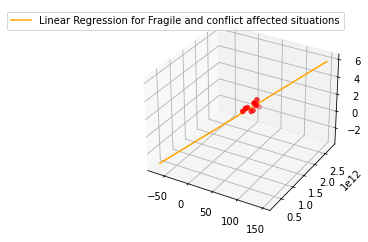

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_fragile["Trade (%GDP)"], df_fragile["GDP Recipient"], df_fragile["FDI (%GDP)"], c='red')

# Linear regression
X = df_fragile[["Trade (%GDP)", "GDP Recipient", "FDI (%GDP)"]].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-5, 5, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'orange', label='Linear Regression for Fragile and conflict affected situations')
ax.legend()

plt.show()

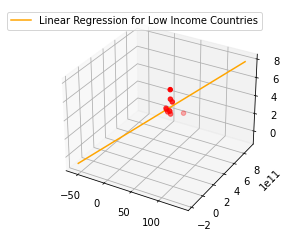

In [111]:
#Low income countries

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_low["Trade (%GDP)"], df_low["GDP Recipient"], df_low["FDI (%GDP)"], c='red')

# Linear regression
X = df_low[["Trade (%GDP)", "GDP Recipient", "FDI (%GDP)"]].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-5, 5, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'orange', label='Linear Regression for Low Income Countries')
ax.legend()

plt.show()

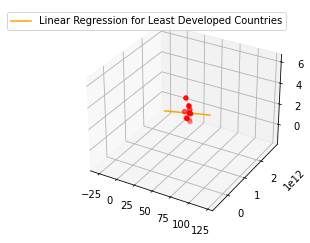

In [112]:
#Least developed countries

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_least["Trade (%GDP)"], df_least["GDP Recipient"], df_least["FDI (%GDP)"], c='red')

# Linear regression
X = df_least[["Trade (%GDP)", "GDP Recipient", "FDI (%GDP)"]].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-5, 5, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'orange', label='Linear Regression for Least Developed Countries')
ax.legend()

plt.show()

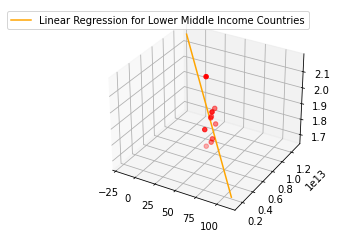

In [113]:
#Lower middle

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_lowermiddle["Trade (%GDP)"], df_lowermiddle["GDP Recipient"], df_lowermiddle["FDI (%GDP)"], c='red')

# Linear regression
X = df_lowermiddle[["Trade (%GDP)", "GDP Recipient", "FDI (%GDP)"]].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-5, 5, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'orange', label='Linear Regression for Lower Middle Income Countries')
ax.legend()

plt.show()

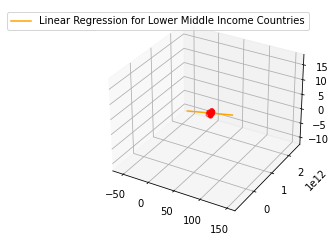

In [114]:
#Heavily


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_heavily["Trade (%GDP)"], df_heavily["GDP Recipient"], df_heavily["FDI (%GDP)"], c='red')

# Linear regression
X = df_heavily[["Trade (%GDP)", "GDP Recipient", "FDI (%GDP)"]].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-5, 5, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'orange', label='Linear Regression for Lower Middle Income Countries')
ax.legend()

plt.show()

In [ ]:
##Creating a file for all gdp
GDP_Total=pd.read_excel("GDP Recipient.xls")
GDP_Total=pd.melt(GDP_Total, id_vars=['Country Name'])
GDP_Total.to_excel("GDP Total.xls")